In [1]:
## Step-1: Common virtual environment was created and activated: myenv
## pip install virtualenv
## virtualenv myenv
## .\myenv\Scripts\activate.ps1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path
import zipfile
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

## Defining a class for categorical output

dataset.csv
Missing values: Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64
Removed 19 duplicate rows.
Categorical columns: Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')
col.unique(): ['F' 'M']
col.value_counts(): Gender
F    293
M     71
Name: count, dtype: int64
col.unique(): ['No' 'Yes']
col.value_counts(): Smoking
No     315
Yes     49
Name: count, dtype: int64
col.unique(): ['No' 'Yes']
col.val

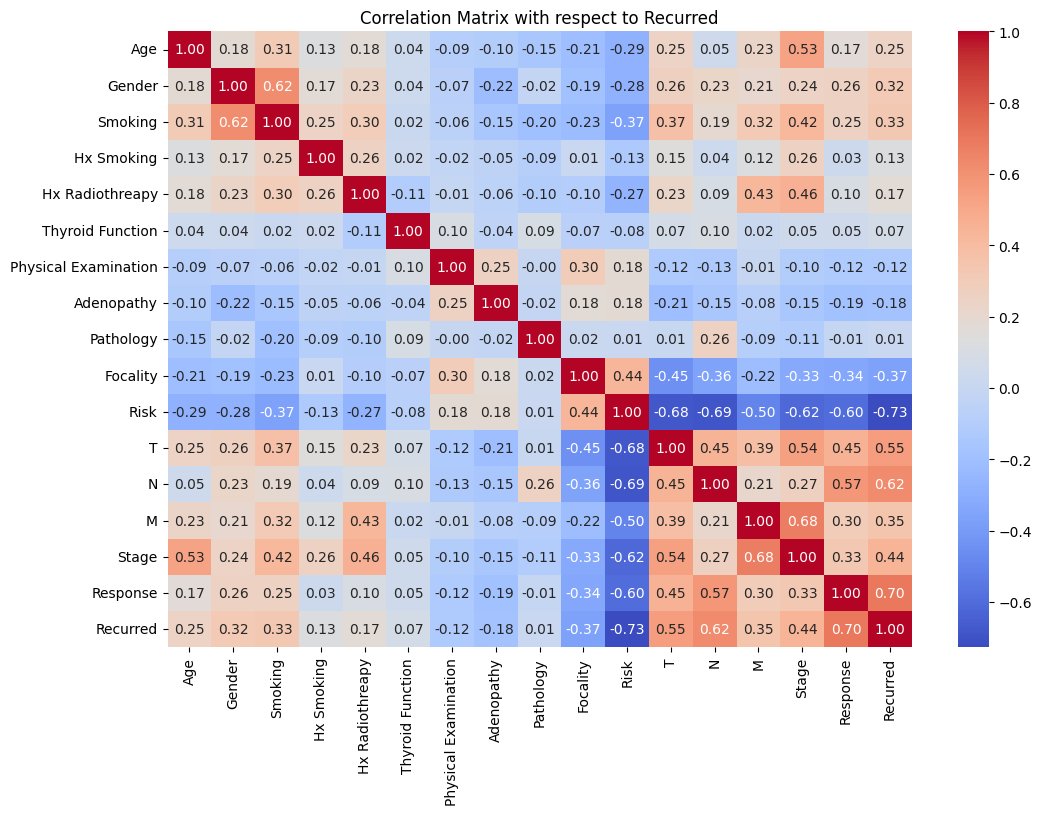

LogisticRegression Accuracy: 0.89
RandomForest Accuracy: 0.96
XGBoost Accuracy: 0.93
Best Model: RandomForestClassifier with accuracy: 0.96


In [ ]:
class categoricalTarget:
    def __init__(self,model, target_column, df):
        """
        Initializes the categoricalTarget class.
        
        Parameters:
        model (str): The name of the model to be used.
        target_column (str): The name of the target column.
        df (pd.DataFrame): The DataFrame containing the data.
        """
        
        self.df = df
        self.target_column = target_column
        self.model = model

    # # Data extraction from zipfile
    def extractingZipFile(zipFilePath, extractTo):
        """
        Extracts the contents of a zip file to a specified directory.
        
        Parameters:
        zipFilePath (str): The path to the zip file.
        extractTo (str): The directory to extract the contents to.
        """
        with zipfile.ZipFile(zipFilePath, 'r') as zip_ref:
            zip_ref.extractall(extractTo)

    # Importing data into a dataframe from csv file in the directory
    def readingData():
      #checking the directory for .csv files
        directory = Path('./')
        # List all CSV files
        for csv_file in directory.glob('*.csv'):
            print(csv_file.name)
        df= pd.read_csv(csv_file)
        return df
    
    # EDA (Exploratory Data Analysis)
    
    # Checking missing values
    def checkMissingValues(df):
        """
        Checks for missing values in the DataFrame 
        Parameters:
        df (pd.DataFrame): The DataFrame to check for missing values.
        Returns:
        missing values
        """
        return df.isnull().sum()
    
    # Removing duplicates
    ## function to check for duplicates and remove dupliates
    def checkDuplicates(df):
        """
        Checks for duplicate rows in the DataFrame and removes them.
        
        Parameters:
        df (pd.DataFrame): The DataFrame to check for duplicates.
        
        Returns:
        pd.DataFrame: The DataFrame with duplicates removed.
        """
        duplicates = df.duplicated().sum()
        if duplicates > 0:
            df = df.drop_duplicates()
            print(f"Removed {duplicates} duplicate rows.")
        else:
            print("No duplicate rows found.")
        return df

    ## function to check categorical columns and replacing them with numerical values
    def checkCategoricalColumns(df):
        """
        Checks for categorical columns in the DataFrame and replaces them with numerical values.
        
        Parameters:
        df (pd.DataFrame): The DataFrame to check for categorical columns.
        
        Returns:
        pd.DataFrame: The DataFrame with categorical columns replaced with numerical values.
        """
        categorical_columns = df.select_dtypes(include=['object']).columns
        print(f"Categorical columns: {categorical_columns}")

        for col in categorical_columns:
            print(f"col.unique(): {df[col].unique()}")
            print(f"col.value_counts(): {df[col].value_counts()}")
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        return df

    ## function to removing the missing values
    def removeMissingValues(df):
        """
        Removes rows with missing values from the DataFrame.
        
        Parameters:
        df (pd.DataFrame): The DataFrame to remove missing values from.
        
        Returns:
        pd.DataFrame: The DataFrame with missing values removed.
        """
        df = df.dropna()
        return df

    #function to print the correlation matrix respect to the target column
    def printCorrelationMatrix(df, target_column):
        """
        Prints the correlation matrix of the DataFrame with respect to the target column.
        
        Parameters:
        df (pd.DataFrame): The DataFrame to print the correlation matrix for.
        target_column (str): The name of the target column.
        
        Returns:
        pd.DataFrame: The correlation matrix.
        """
        # print the correlation matrix with respect to the target column
        print(f"Correlation matrix with respect to {target_column}:")
        corr_text=df.corr()[target_column].sort_values(ascending=False)
        with open('correlation.txt', 'w') as f:
            f.write(corr_text)
        print(corr_text)


        corr = df.corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
        plt.title(f"Correlation Matrix with respect to {target_column}")
        plt.show()
        return corr

    ## function to split the data into train and test
    def splitData(df, target_column):
        """
        Splits the DataFrame into training and testing sets.
        
        Parameters:
        df (pd.DataFrame): The DataFrame to split.
        target_column (str): The name of the target column.
        
        Returns:
        tuple: The training and testing sets.
        """
        X = df.drop(target_column, axis=1)
        y = df[target_column]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        return X_train, X_test, y_train, y_test

    # function to train the model and compare the models and save the best model and the model report and the model performance
    def trainModel(X_train, X_test, y_train, y_test):
        """
        Trains the model and compares the models and saves the best model and the model report and the model performance.
        
        Parameters:
        X_train (pd.DataFrame): The training data.
        X_test (pd.DataFrame): The testing data.
        y_train (pd.Series): The training labels.
        y_test (pd.Series): The testing labels.
        
        Returns:
        None
        """
        models = {
            "LogisticRegression": LogisticRegressionCV(),
            "RandomForest": RandomForestClassifier(),
            "XGBoost": XGBClassifier()
        }
        
        best_model = None
        best_accuracy = 0
        
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            
            print(f"{name} Accuracy: {accuracy:.2f}")
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                best_model_name = name
        
        print(f"Best Model: {best_model.__class__.__name__} with accuracy: {best_accuracy:.2f}")
        
        # Save the best model
        joblib.dump(best_model_name, f'{best_model_name}.pkl')
        
        # Save the classification report
        report = classification_report(y_test, y_pred)
        with open('classification_report.txt', 'w') as f:
            f.write(report)
        
        # Save the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        np.savetxt('confusion_matrix.txt', cm, fmt='%d')

    # function to load the model
    def loadModel(model_path):
        """
        Loads the model from the specified path.
        
        Parameters:
        model_path (str): The path to the model.
        
        Returns:
        model: The loaded model.
        """
        model = joblib.load(model_path)
        return model
    
# making an object of the class to use the functions
def main():
    
    # Reading the data
    df = categoricalTarget.readingData()
    
    # Checking for missing values
    missing_values = categoricalTarget.checkMissingValues(df)
    print(f"Missing values: {missing_values}")
    
    # Checking for duplicates
    df = categoricalTarget.checkDuplicates(df)
    
    # Checking for categorical columns
    df = categoricalTarget.checkCategoricalColumns(df)
    
    # Removing missing values
    df = categoricalTarget.removeMissingValues(df)
    
    # Choosing the target column
    target_column = input("Enter the target column name: ")
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in DataFrame.")
    else:
        print(f"Target column '{target_column}' found in DataFrame.")
    
    # Printing the correlation matrix
    corr_matrix = categoricalTarget.printCorrelationMatrix(df, target_column)
    
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = categoricalTarget.splitData(df, target_column)
    
    # Training the model and saving the best model
    categoricalTarget.trainModel(X_train, X_test, y_train, y_test)    

main()